In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Cardata.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df['years_used'] = 2022 - df['year']

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_used
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,15
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,15
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,10
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [5]:
df.drop(columns=['name'], inplace=True)

In [6]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_used
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,15
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,15
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,10
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [7]:
df = pd.get_dummies(df, drop_first=True)

In [8]:
df.head()

,year,selling_price,km_driven,years_used,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,2007,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


<AxesSubplot:>

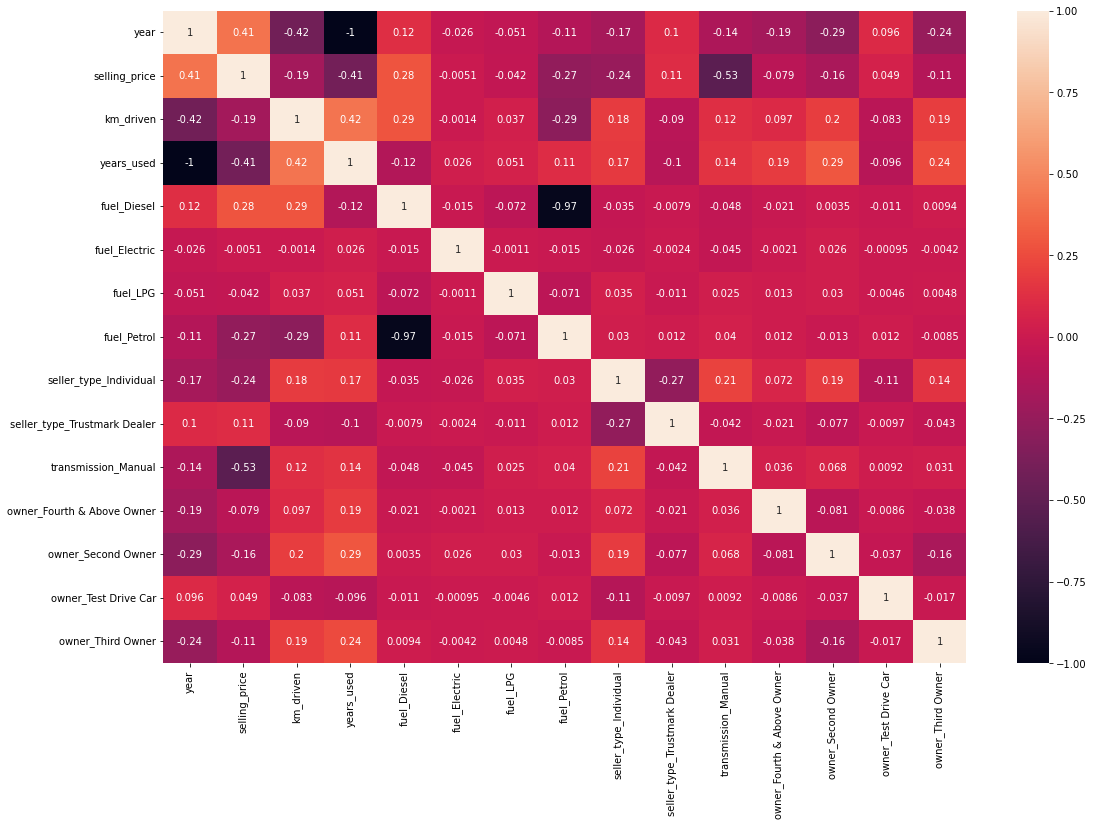

In [9]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)


In [10]:
df.head()

,year,selling_price,km_driven,years_used,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,2007,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [11]:
df.drop(columns=['year'], inplace=True)

In [12]:
df.head()

,selling_price,km_driven,years_used,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [13]:
## X --> Independent Feature, y--> Dependent Feature
X = df.iloc[:, 1:].values
y = df.iloc[:,:1].values
type(y)

numpy.ndarray

In [14]:
X.shape, y.shape

((4340, 13), (4340, 1))

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
model_rfr = RandomForestRegressor()

In [19]:
## Hyper Parameter Tuning using Randomized Search CV 
from sklearn.model_selection import RandomizedSearchCV
import numpy as np 

In [20]:
n_estimators = [int(x) for x in np.linspace(100,1500,15)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2,10,5)]
min_samples_split = [int(x) for x in np.linspace(2,100,5)]
min_samples_leaf = [1,2,5,10]

In [21]:
random_rf = {
    "n_estimators": n_estimators, 
    "max_features": max_features,
    "max_depth": max_depth,       
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf
}

In [22]:
rf_random = RandomizedSearchCV(
        estimator= model_rfr,
        param_distributions= random_rf,
        n_iter=15,
        scoring='neg_mean_squared_error',
        refit=True,
        cv=5,
        verbose=0,
    )

In [23]:
rf_random.fit(X_train, y_train.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=15,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 26, 51, 75,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   scoring='neg_mean_squared_error')

In [24]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8}

In [25]:
prediction = rf_random.predict(X_test)

In [26]:
X_test.shape

(868, 13)

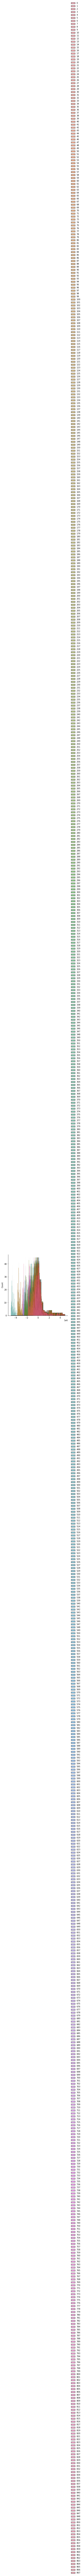

In [27]:
sns.displot(y_test-prediction)

In [28]:
import pickle

In [29]:
file = open('randomforest_regressionmodel.pkl', 'wb')
pickle.dump(random_rf, file)

In [30]:
from sklearn.metrics import r2_score, mean_squared_error

In [31]:
mean_squared_error(y_test, prediction)

93237674361.14658

In [32]:
r2_score(y_test, prediction)

0.6914289457090863

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
dtr = DecisionTreeRegressor()

In [35]:
max_depth=[int(x) for x in np.linspace(2,10,5)]
min_samples_split= [int(x) for x in np.linspace(2,10,5)]
min_samples_leaf=[2,4,5,6]
max_features = ['auto', 'sqrt']
max_leaf_nodes=[2,3,5,6]

In [36]:
decision_tree = {
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "max_features": max_features,
    "max_leaf_nodes": max_leaf_nodes
}

In [37]:
decision_tree

{'max_depth': [2, 4, 6, 8, 10],
 'min_samples_split': [2, 4, 6, 8, 10],
 'min_samples_leaf': [2, 4, 5, 6],
 'max_features': ['auto', 'sqrt'],
 'max_leaf_nodes': [2, 3, 5, 6]}

In [38]:
main_model = RandomizedSearchCV(
        estimator = dtr,
        param_distributions= decision_tree,
        n_iter=10,
        scoring='neg_mean_squared_error',
        n_jobs=2,
        refit=True,
        cv=5,
        verbose=2,
)

In [39]:
main_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=2,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': [2, 3, 5, 6],
                                        'min_samples_leaf': [2, 4, 5, 6],
                                        'min_samples_split': [2, 4, 6, 8, 10]},
                   scoring='neg_mean_squared_error', verbose=2)

In [40]:
main_model.best_score_

-163421761125.93423

In [41]:
main_model.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 6,
 'max_features': 'auto',
 'max_depth': 4}

In [42]:
y_hat = main_model.predict(X_test)

In [43]:
r2_score(y_test,y_hat)

0.5337475672034628